Kidney Disease Prediction

In [9]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore

import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set()

# If you're in Jupyter notebook
%matplotlib inline

# Set display options for pandas
pd.set_option('display.max_columns', 26)


In [ ]:
%pip install plotly

In [10]:
#loading the data 
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\DP\modernDP\data\kidney.csv')
df.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Red Blood Cells: normal,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80,1.020,1.0,0,121.000000,36.0,1.2,136.0,4.7,15.4,44.0,7800.0,5.200000,1,1,0,0,1,1,0,0,0,0,1
1,7.0,50,1.020,4.0,0,90.316581,18.0,0.8,140.0,4.0,11.3,38.0,6000.0,4.721717,1,1,0,0,0,0,0,0,0,0,1
2,62.0,80,1.010,2.0,3,423.000000,53.0,1.8,135.0,4.8,9.6,31.0,7500.0,3.400000,1,1,0,0,0,1,0,1,0,1,1
3,48.0,70,1.005,4.0,0,117.000000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,1,0,1,0,0,1,1,1,1
4,51.0,80,1.010,2.0,0,106.000000,26.0,1.4,140.0,4.0,11.6,35.0,7300.0,4.600000,1,1,0,0,0,0,0,0,0,0,1


In [11]:
df.shape

(400, 25)

In [13]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [14]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80,1.020,1.0,0,121.000000,36.0,1.2,136.0,4.7,15.4,44.0,7800.0,5.200000,1,1,0,0,1,1,0,0,0,0,1
1,7.0,50,1.020,4.0,0,90.316581,18.0,0.8,140.0,4.0,11.3,38.0,6000.0,4.721717,1,1,0,0,0,0,0,0,0,0,1
2,62.0,80,1.010,2.0,3,423.000000,53.0,1.8,135.0,4.8,9.6,31.0,7500.0,3.400000,1,1,0,0,0,1,0,1,0,1,1
3,48.0,70,1.005,4.0,0,117.000000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,1,0,1,0,0,1,1,1,1
4,51.0,80,1.010,2.0,0,106.000000,26.0,1.4,140.0,4.0,11.6,35.0,7300.0,4.600000,1,1,0,0,0,0,0,0,0,0,1


In [15]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.591123,76.300000,1.017449,0.935797,0.395000,146.005923,56.806872,3.022922,137.387860,4.569293,12.437039,38.367791,8356.577660,4.589940,0.830000,0.800000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,17.042814,13.593084,0.005597,1.311653,1.040038,76.422249,49.808436,5.631037,9.273123,2.829638,2.792771,8.449610,2620.319668,0.922888,0.376103,0.400501,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.900000,10.508490,32.000000,6700.000000,3.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,119.491153,41.000000,1.300000,138.000000,4.400000,12.259382,39.000000,8231.186346,4.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,159.250000,65.250000,2.800000,141.000000,4.900000,14.800000,44.000000,9577.140214,5.200000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    int64  
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [17]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    int64  
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [22]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [23]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

In [24]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [25]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [26]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has [1 0] values

coronary_artery_disease has [0 1] values

class has [nan] values



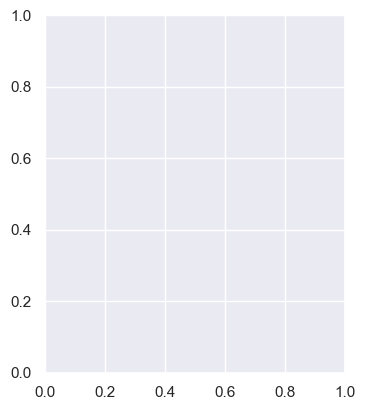

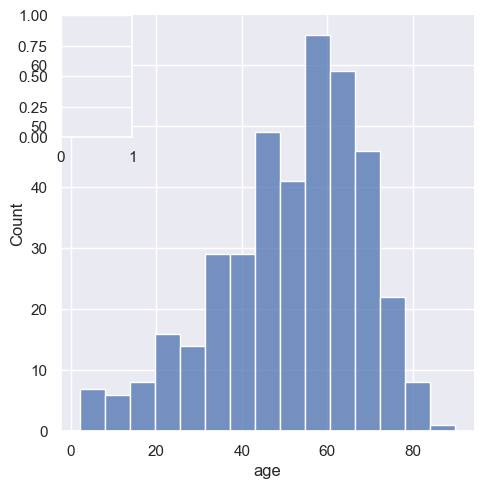

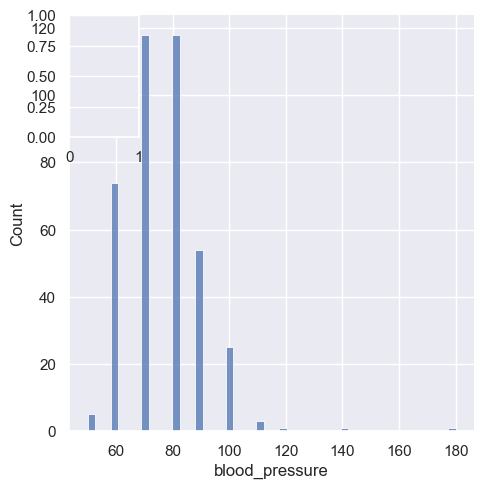

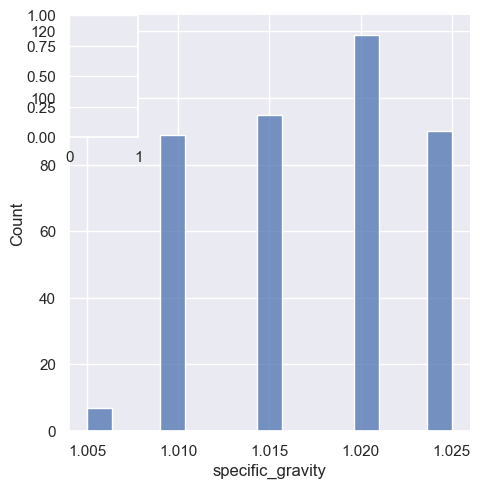

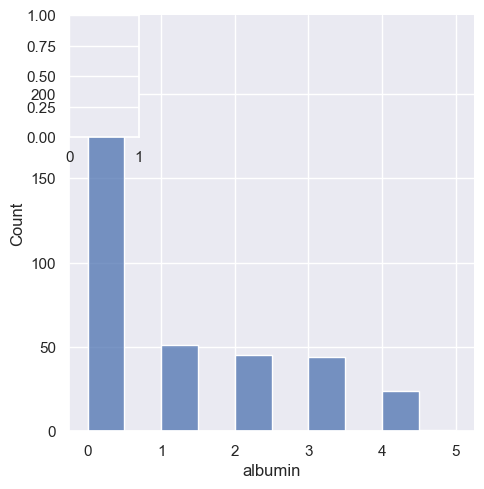

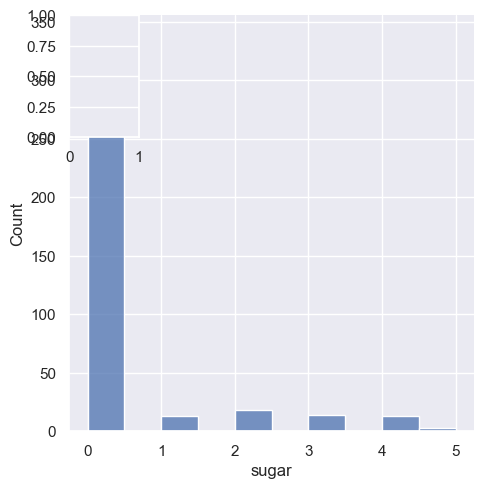

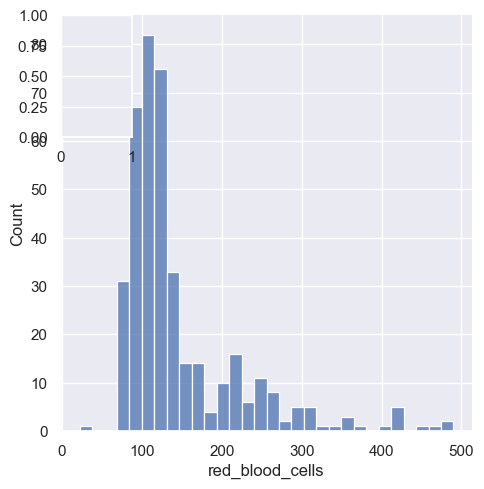

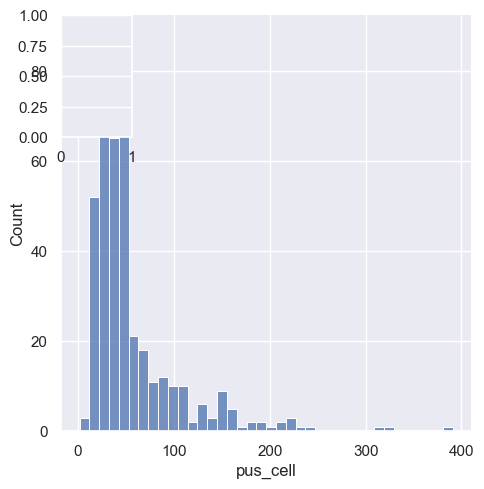

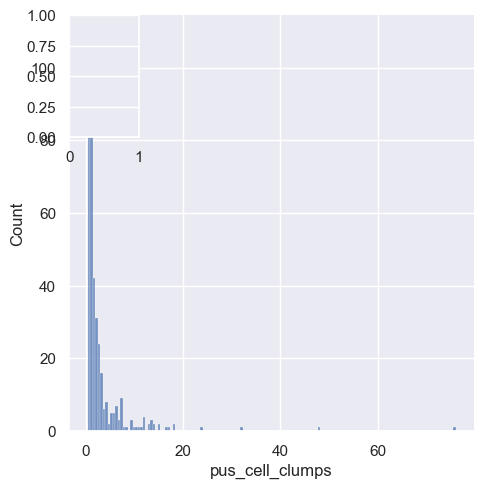

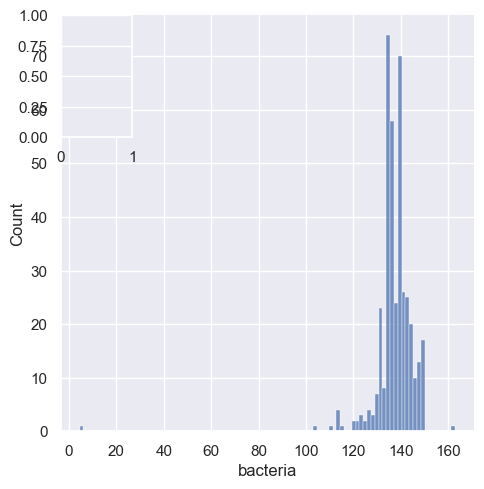

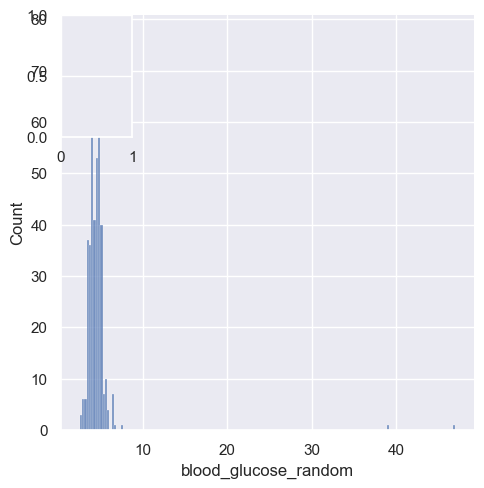

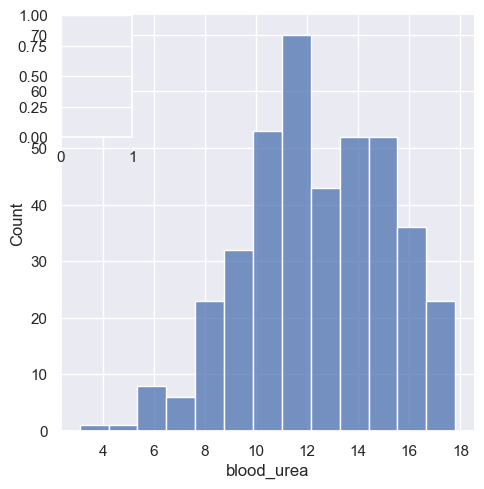

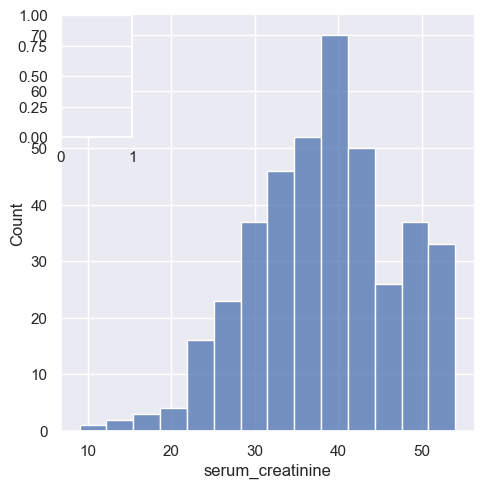

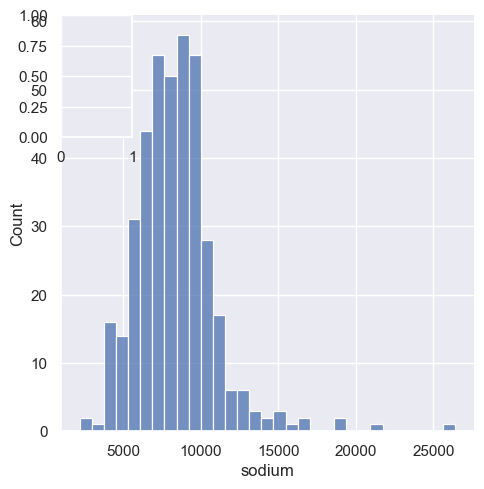

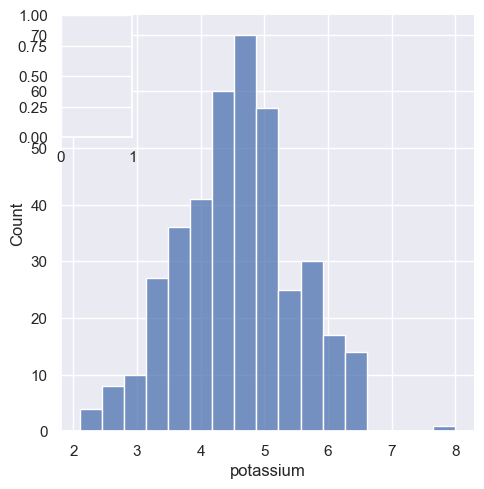

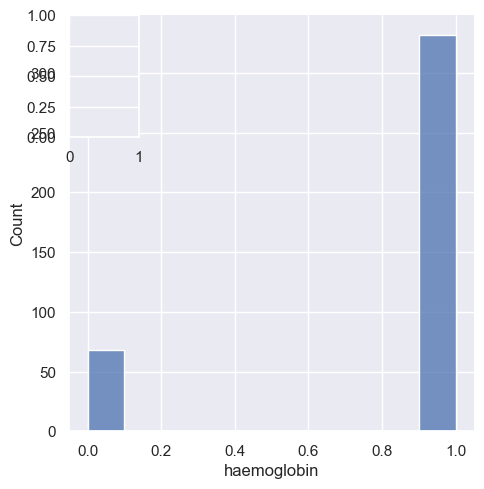

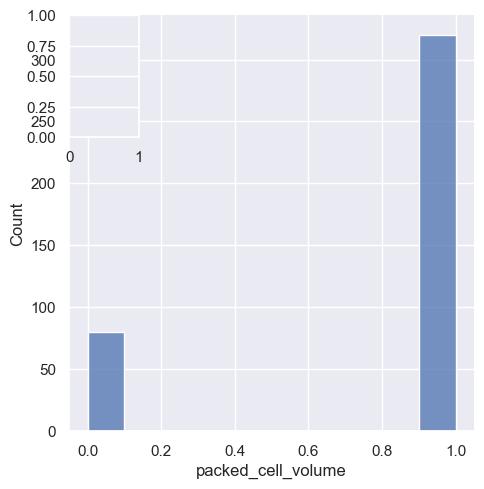

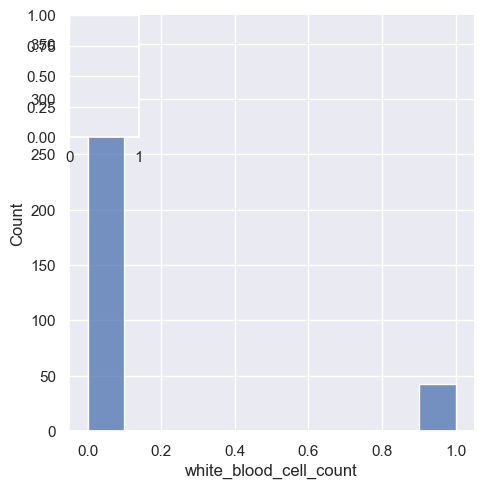

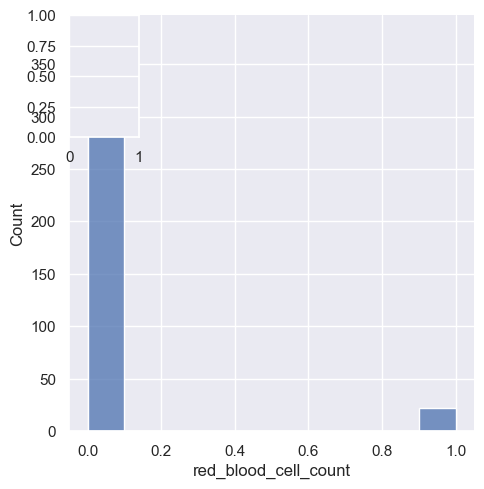

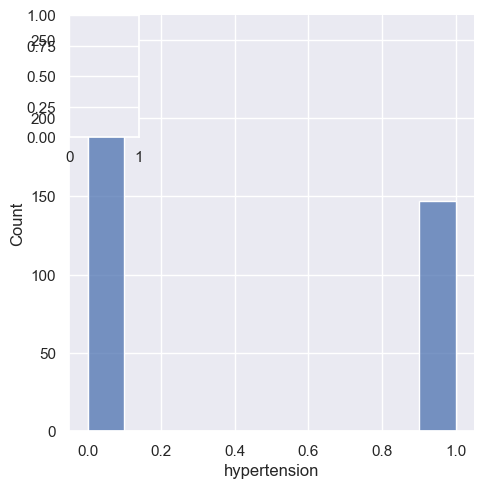

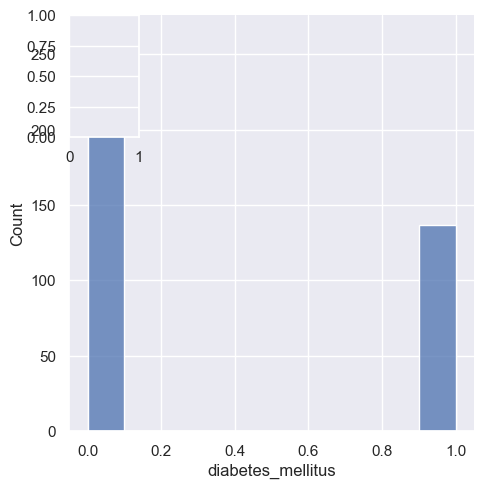

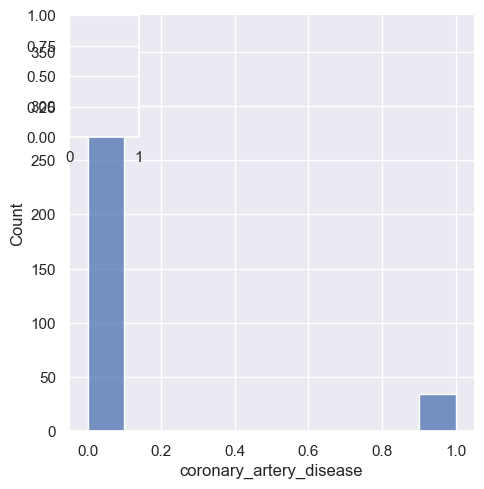

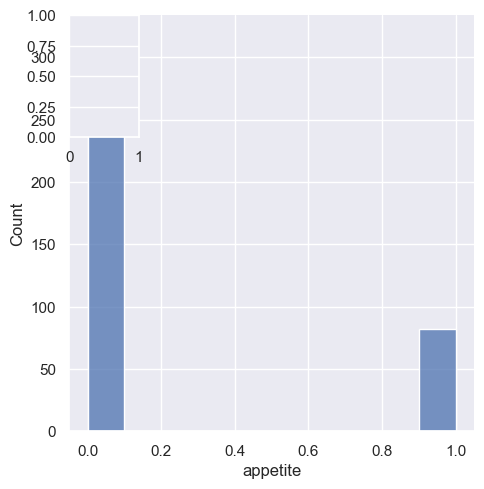

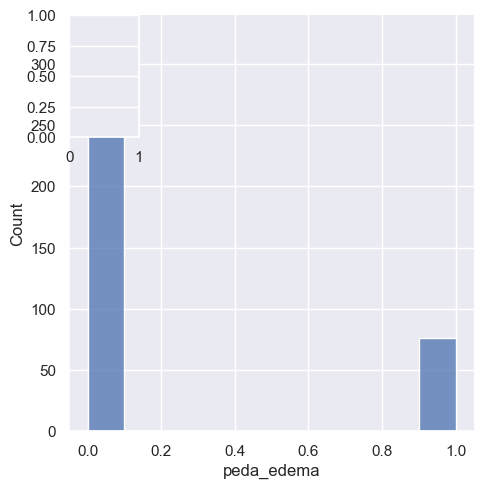

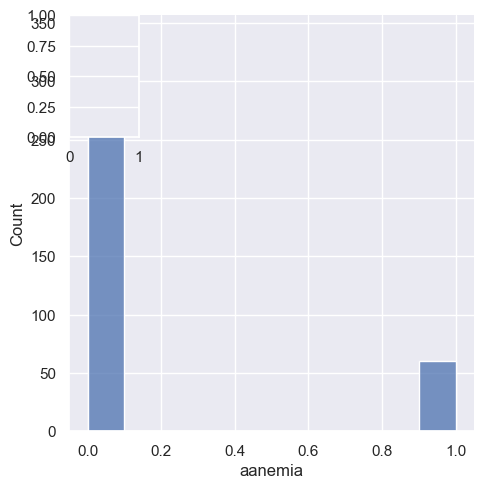

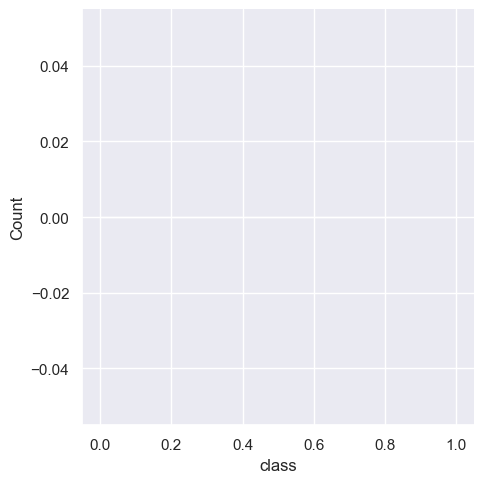

In [27]:
#checking numerical features distribution
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3,5,plotnumber)
        sns.displot(df[column])
        plt.xlabel(column)
plotnumber += 1

plt.tight_layout()
plt.show()